This notebook opens the MUSE files and locates the SNe within them, plotting them in a folder.
This notebook also writes the MUSE galaxies and their filenames in ../Data/MUSEdata.csv

The MUSE files have this address: /data/fourier/sun.1608/PHANGS/MUSE/DR2.1/MUSEDAP/copt/


In [64]:
import matplotlib.pyplot as plt
from astropy.io import fits
import sys, os
# !{sys.executable} -m pip install aplpy
import numpy as np
import aplpy
from astropy.table import Table

In [65]:
# Organize MUSE galaxies and their information in MUSE table

fileList = "../Data/0.JWST_file_list.csv"
galaxies, fileNames = np.genfromtxt(fileList, dtype=str, unpack=True, usecols=(0,1))

JWSTtable = Table({"Galaxy": galaxies, 
                   "JWSTmap": fileNames})

JWSTtable.sort("Galaxy")
JWSTtable.write('../Data/0.JWSTdata.csv', overwrite=True)  

JWSTtable


Galaxy,JWSTmap
str37,str37
IC5332,jw02107-o018_t017_miri_f770w_i2d.fits
NGC7496,jw02107-o038_t019_miri_f770w_i2d.fits


In [16]:
# for i in range(len(JWSTtable)):
#     fileName = JWSTtable["JWSTmap"][i]
#     hdulist = fits.open(fileName)
#     hdr  = hdulist[1].header
#     data = hdulist[1].data
#     logData = np.log10(data)
#     plt.imshow(logData)
#     fig.show_colorscale(cmap = 'magma')
#     fig.set_title(MUSEtable["Galaxy"][i])
#     figName = "../Figures/JWSTImages/" + JWSTtable["Galaxy"][i] + ".png"
#     fig.savefig(figName, dpi=300)
#     plt.show()
#     plt.close()

# # JWSTtable

Galaxy,JWSTmap
str38,str38
IC5332,jw02107-o018_t017_miri_f1130w_i2d.fits
NGC7496,jw02107-o038_t019_miri_f1130w_i2d.fits


<ipython-input-95-dce31086ac87>:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-95-dce31086ac87>:38: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plots[0])
<ipython-input-95-dce31086ac87>:41: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plots[1])


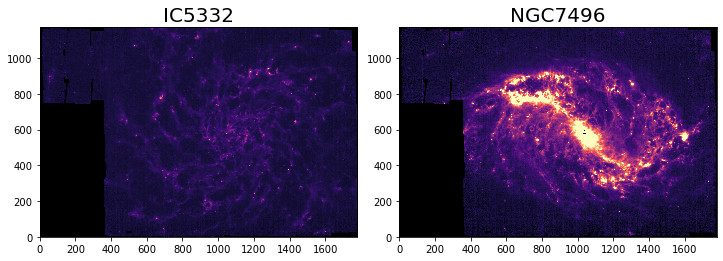

In [95]:
# set up plots & wcs information.
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
from astropy.wcs import WCS
plots, wcss, hdus = [],[],[]

for i in range(len(JWSTtable)):
    fileName = "../Data/" + JWSTtable["JWSTmap"][i]
    if os.path.isfile(fileName):
        JWST_hdu = pyfits.open(fileName)
        hdus.append(JWST_hdu)
        JWST_map = JWST_hdu[1].data
        plots.append(JWST_map)
        wcss.append(WCS(JWST_hdu[1].header, naxis=2))

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

# make multipanel plot of JWST galaxies 
import math
# i,j,m=0,0,0
# PLOTS_PER_ROW = 3
# fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
# for plot in plots:
#     logplot = np.log10(plot)
#     axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest")
#     axs[i][j].set_title(JWSTtable["Galaxy"][m].upper(), fontsize=20)
#     axs[i][j].set_xticks([])
#     axs[i][j].set_yticks([])
#     j+=1
#     if j%PLOTS_PER_ROW==0:
#         i+=1
#         j=0
#     m+=1

fig, axs = plt.subplots(1,2, figsize=(10, 5))

logplot = np.log10(plots[0])
axs[0].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin=0.7, vmax=1.5)
axs[0].set_title(JWSTtable["Galaxy"][0].upper(), fontsize=20)
logplot = np.log10(plots[1])
axs[1].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin=0.7, vmax=1.1)
axs[1].set_title(JWSTtable["Galaxy"][1].upper(), fontsize=20)
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllJWSTGalaxies.png", dpi=300)
plt.close()

